# Linear Regression from Scratch (Using Gradient Descent)

In this notebook, we:
- Implement linear regression **from scratch** (no sklearn model)
- Derive and apply the **cost function** and **gradients manually**
- Visualize the **cost over iterations**

This is a hands-on exercise to **deepen understanding** of:
- Gradient descent optimization


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_regression

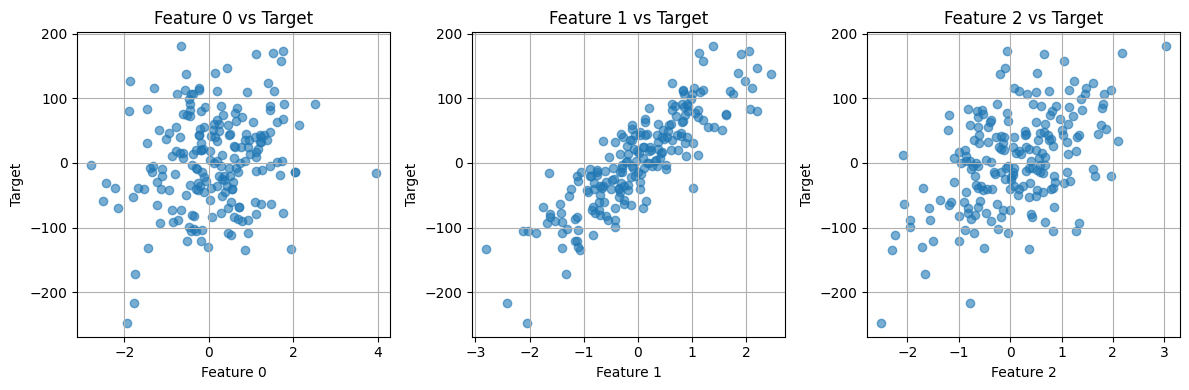

In [ ]:
X, y = make_regression(n_samples=200, n_features=3, noise=5, random_state=1)

plt.figure(figsize=(12, 4))
for i in range(X.shape[1]):
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, i], y, alpha=0.6)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def compute_cost(X, y, W, b):
    # compute cost for linear regression
    m = X.shape[0]
    total_cost = 0

    for i in range(m):
        f_wb = np.dot(X[i], W) + b     # prediction for example i
        total_cost += (f_wb - y[i])**2 # squared error

    total_cost = total_cost / (2 * m)  # mean squared error cost
    return total_cost

In [ ]:
def compute_gradient(X, y, W, b):
    # compute gradient for linear regression
    m = X.shape[0]
    dJ_dW = np.zeros(W.shape)
    dJ_db = 0

    for i in range(m):
        f_wb = np.dot(X[i], W) + b          # prediction
        error = f_wb - y[i]                 # error
        dJ_dW += error * X[i]               # gradient wrt W
        dJ_db += error                      # gradient wrt b

    dJ_dW = dJ_dW / m
    dJ_db = dJ_db / m
    return dJ_dW, dJ_db

In [ ]:
def gradient_descent(X, y, W, b, cost_function, gradient_function, alpha, num_iters):
    # gradient descent for linear regression
    m = X.shape[0]
    J_history = []     # to record cost
    W_history = []     # to record W

    for i in range(num_iters):
        dJ_dW, dJ_db = gradient_function(X, y, W, b)  # compute gradients
        W = W - alpha * dJ_dW                         # update W
        b = b - alpha * dJ_db                         # update b

        cost = cost_function(X, y, W, b)              # compute cost
        J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:        # log progress
            W_history.append(W.copy())
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return W, b, J_history, W_history

In [ ]:
initial_W = np.zeros(X.shape[1])
initial_b = 0.0
iterations = 8000
alpha = 0.001

W, b, J_history, W_history = gradient_descent(X, y, initial_W, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("\n\nFound by gradient descent:")
print("W: ", W)
print("b: ", b)

Iteration    0: Cost  2750.77
Iteration  800: Cost   582.01
Iteration 1600: Cost   133.85
Iteration 2400: Cost    39.24
Iteration 3200: Cost    18.84
Iteration 4000: Cost    14.35
Iteration 4800: Cost    13.34
Iteration 5600: Cost    13.11
Iteration 6400: Cost    13.06
Iteration 7200: Cost    13.05


Found by gradient descent:
W:  [18.59733584 64.57743555 32.84511604]
b:  -0.49277860433124804


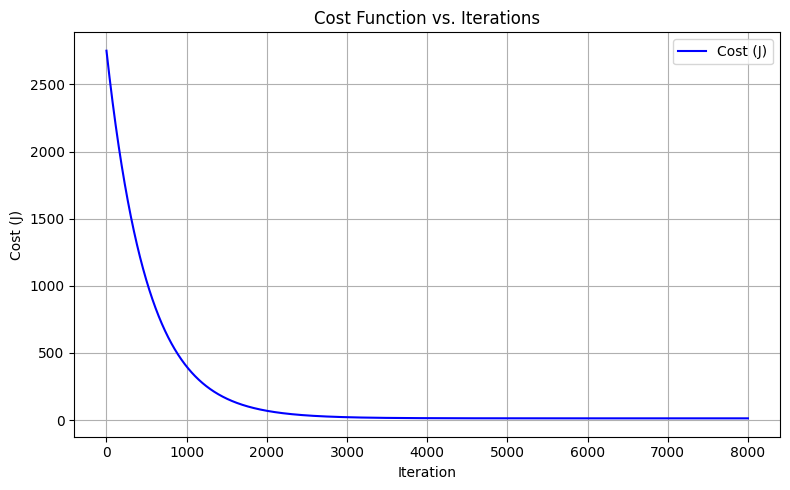

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(J_history, label="Cost (J)", color='blue')
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.title("Cost Function vs. Iterations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
predicted = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    predicted[i] = np.dot(X[i], W) + b

In [ ]:
n_samples = 20
df_results = pd.DataFrame({
    "Actual": y[:n_samples],
    "Predicted": predicted[:n_samples]
})

df_results

,Actual,Predicted
0,-56.635200,-62.178141
1,-93.493952,-86.476712
2,-38.899992,-32.255895
3,18.546207,19.268237
4,30.524416,32.059369
5,-77.380829,-75.350402
6,-73.026228,-67.973351
7,-2.748847,0.224412
8,24.761296,21.235134
9,-2.588544,-3.976121
